<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [226]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


## Loading Data to Pandas DataFrame

In [227]:
data = pd.read_csv('real-estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [228]:
data.shape

(414, 8)

## Droping Unnecessary Columns

In [229]:
# Dropping the 'No' column as it is just an identifier and not relevant for prediction
data = data.drop(columns=['No'])

# Converting 'X1 transaction date' to only have the year value by splitting and keeping the first part
data['X1 transaction date'] = data['X1 transaction date'].apply(lambda x: str(x).split('.')[0])

# Dropping the 'X1 transaction date' column as mutual information with house price is zero, indicating irrelevance
# Observations obtained from subsequent steps; to see this result, comment out the line below.
data = data.drop(columns=['X1 transaction date'])


## Splitting Data to Train and Test

In [230]:
# Splitting the dataset into training and testing sets
X = data.drop(columns=['Y house price of unit area'])
y = data['Y house price of unit area']

# Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (331, 5) (331,)
Testing set shape: (83, 5) (83,)


## Visualizing Data Distribution and Correlation

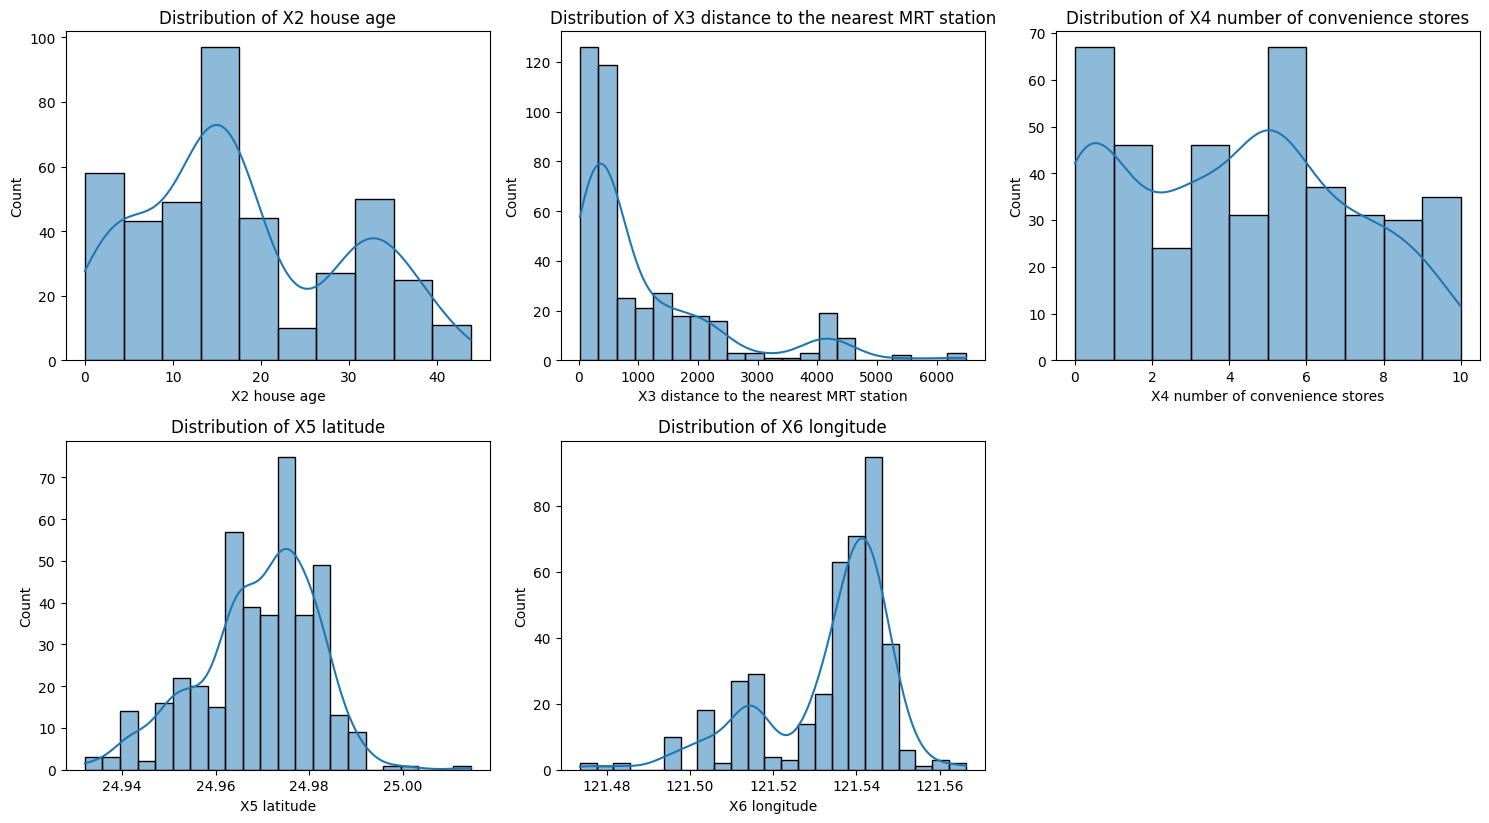

In [231]:
# Visualizing the distribution of each feature in the dataset
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a list of column headers not including the price column
features = data.columns.drop('Y house price of unit area')

# Plot each column
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Adjust the grid parameters based on your number of features
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

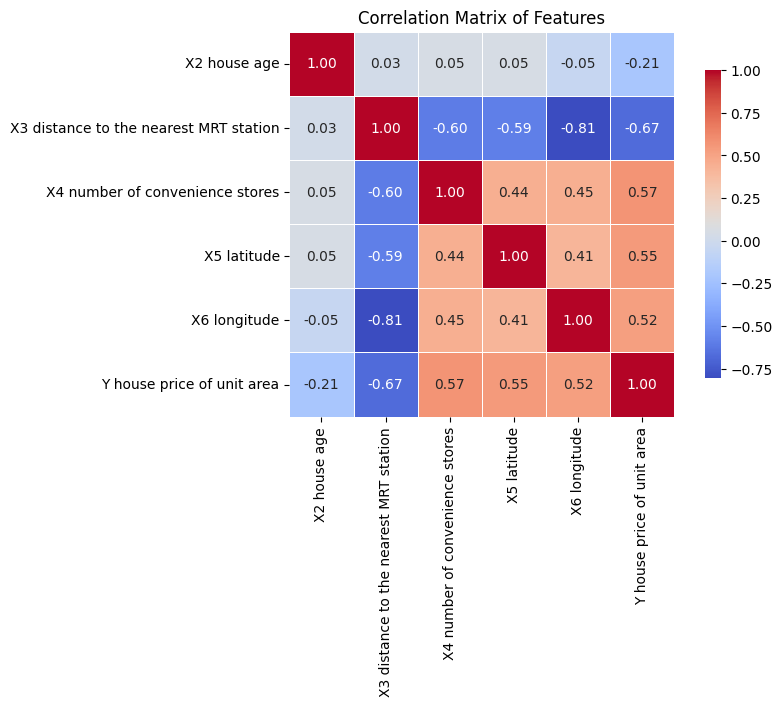

In [232]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Setting up the matplotlib figure for the heatmap
plt.figure(figsize=(8, 5))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})

# Adding a title
plt.title('Correlation Matrix of Features')

# Showing the plot
plt.show()

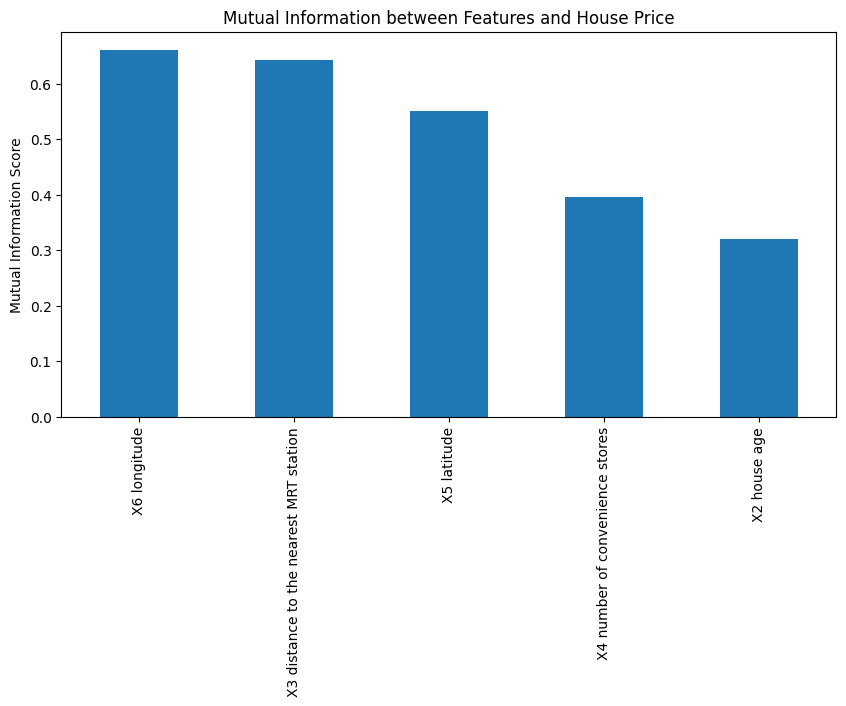

In [233]:
# Calculate the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Plotting the mutual information
plt.figure(figsize=(10, 5))
mutual_info_series.sort_values(ascending=False).plot.bar()
plt.title('Mutual Information between Features and House Price')
plt.ylabel('Mutual Information Score')
plt.show()

the transaction date must be delete from columns.

## Linear Regression

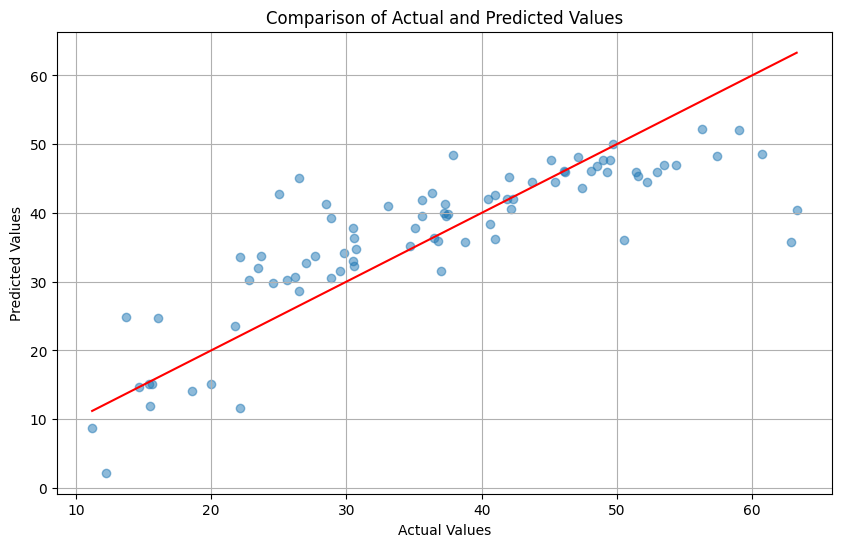

Linear Regression - Mean Squared Error: 54.58
Linear Regression - R^2 Score: 0.67


In [234]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate and print the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()


print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R^2 Score: {r2:.2f}")

## Polynomial Regression

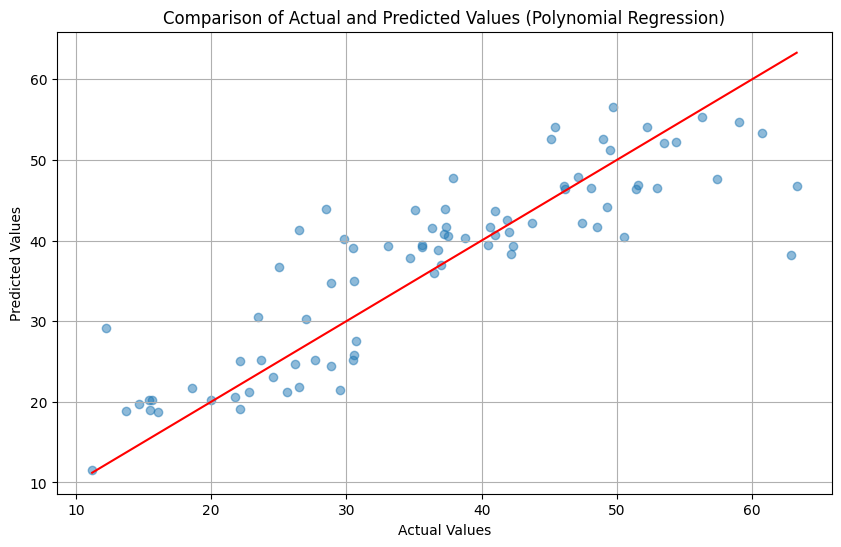

Polynomial Regression - Mean Squared Error: 41.85
Polynomial Regression - R^2 Score: 0.75


In [235]:
# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Polynomial Regression model
poly_reg = LinearRegression()

# Fit the model on the polynomial features
poly_reg.fit(X_train_poly, y_train)

# Predict on the polynomial testing data
y_pred_poly = poly_reg.predict(X_test_poly)

# Calculate and print the metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Plotting y_test vs y_pred_poly
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()

print(f"Polynomial Regression - Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression - R^2 Score: {r2_poly:.2f}")


## Ridge Regression

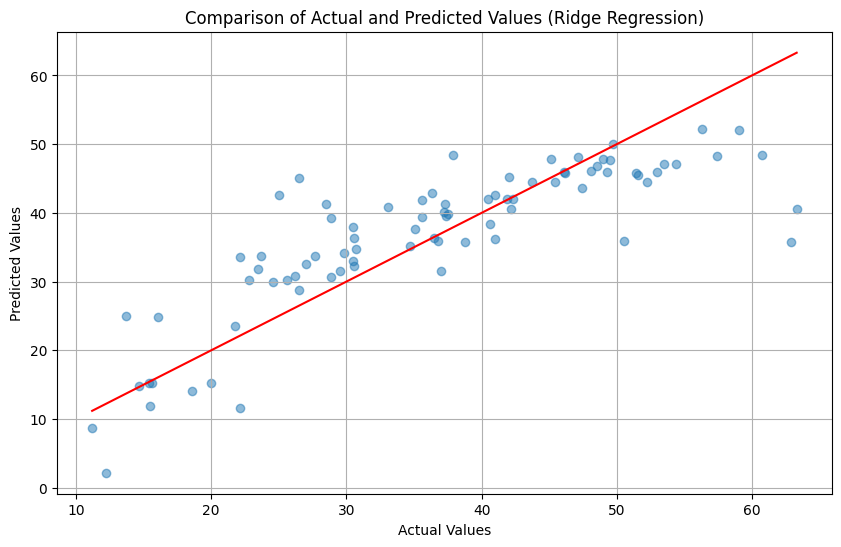

Ridge Regression - Mean Squared Error: 54.58
Ridge Regression - R^2 Score: 0.67


In [236]:
# Create a Ridge Regression model with an alpha value of 0.001
ridge_reg = Ridge(alpha=0.001)

# Fit the model on the polynomial features
ridge_reg.fit(X_train, y_train)

# Predict on the polynomial testing data
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate and print the metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plotting y_test vs y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()

print(f"Ridge Regression - Mean Squared Error: {mse_ridge:.2f}")
print(f"Ridge Regression - R^2 Score: {r2_ridge:.2f}")


## Lasso Regression

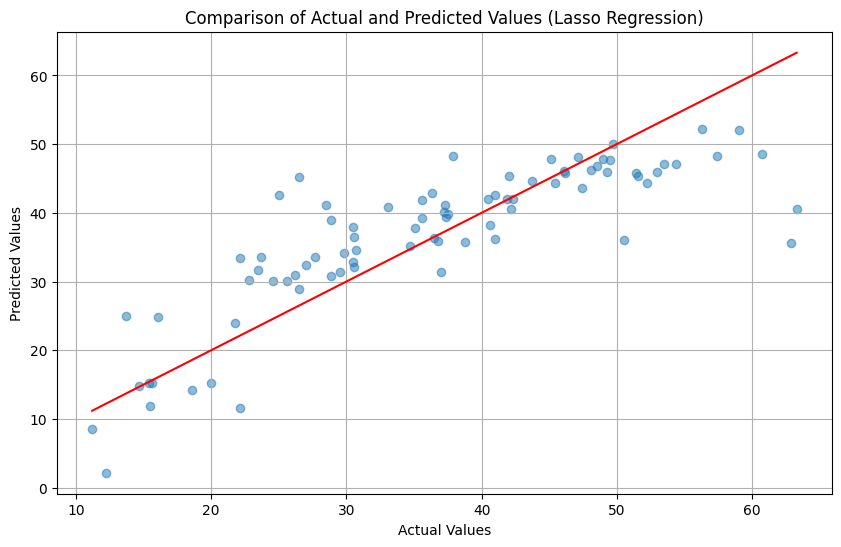

Lasso Regression - Mean Squared Error: 54.45
Lasso Regression - R^2 Score: 0.68


In [237]:
# Create a Lasso Regression model with an alpha value of 0.001
lasso_reg = Lasso(alpha=0.001)

# Fit the model on the polynomial features
lasso_reg.fit(X_train, y_train)

# Predict on the polynomial testing data
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate and print the metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Plotting y_test vs y_pred_lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()

print(f"Lasso Regression - Mean Squared Error: {mse_lasso:.2f}")
print(f"Lasso Regression - R^2 Score: {r2_lasso:.2f}")


## Elastic Net Regression

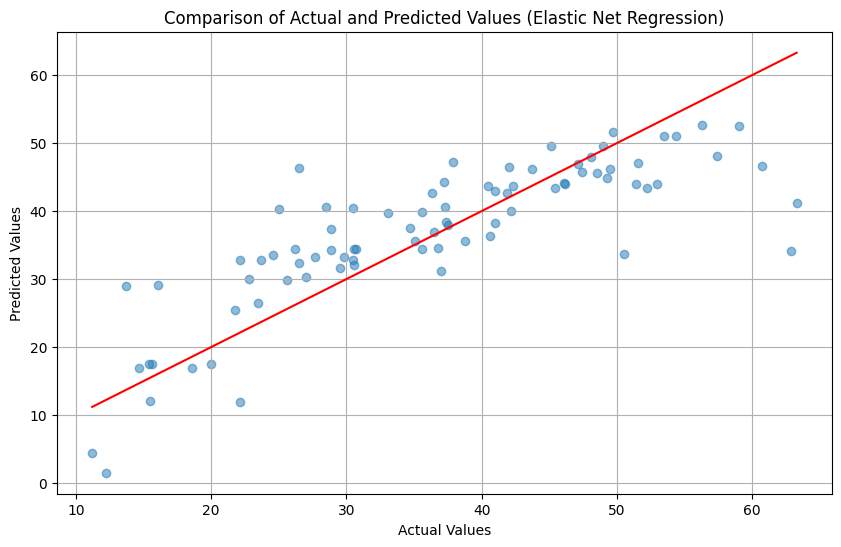

Elastic Net Regression - Mean Squared Error: 58.95
Elastic Net Regression - R^2 Score: 0.65


In [238]:
# Create an Elastic Net Regression model with an alpha value of 0.1 and l1_ratio of 0.5
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model on the polynomial features
elastic_net_reg.fit(X_train, y_train)

# Predict on the polynomial testing data
y_pred_elastic_net = elastic_net_reg.predict(X_test)

# Calculate and print the metrics
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

# Plotting y_test vs y_pred_elastic_net
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values (Elastic Net Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()

print(f"Elastic Net Regression - Mean Squared Error: {mse_elastic_net:.2f}")
print(f"Elastic Net Regression - R^2 Score: {r2_elastic_net:.2f}")


## XGBoost Regression 

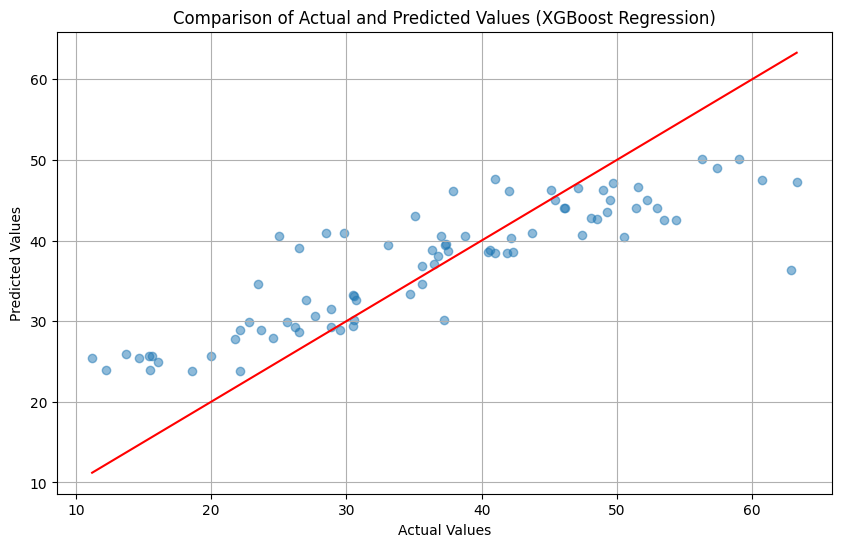

XGBoost Regression - Mean Squared Error: 54.80
XGBoost Regression - R^2 Score: 0.67


In [239]:
# Create an XGBoost Regression model using scikit-learn
xgb_reg = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=10, 
                                    subsample=0.3, criterion='friedman_mse', max_depth=5, alpha=0.9)

# Fit the model on the training data
xgb_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_reg.predict(X_test)

# Calculate and print the metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Plotting y_test vs y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.title('Comparison of Actual and Predicted Values (XGBoost Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect prediction
plt.grid(True)
plt.show()

print(f"XGBoost Regression - Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Regression - R^2 Score: {r2_xgb:.2f}")


# Assosiation Rules

############################ Frequent Itemset ###############################
    support              itemsets
0      0.35             (BISCUIT)
1      0.20           (BOURNVITA)
2      0.65               (BREAD)
3      0.40              (COFFEE)
4      0.30          (CORNFLAKES)
5      0.25               (MAGGI)
6      0.25                (MILK)
7      0.30               (SUGER)
8      0.35                 (TEA)
9      0.20      (BISCUIT, BREAD)
10     0.20         (MILK, BREAD)
11     0.20        (BREAD, SUGER)
12     0.20          (TEA, BREAD)
13     0.20  (CORNFLAKES, COFFEE)
14     0.20       (SUGER, COFFEE)
15     0.20          (TEA, MAGGI)
############################ Association Rules ############################
  antecedents consequents
0      (MILK)     (BREAD)
1     (MAGGI)       (TEA)


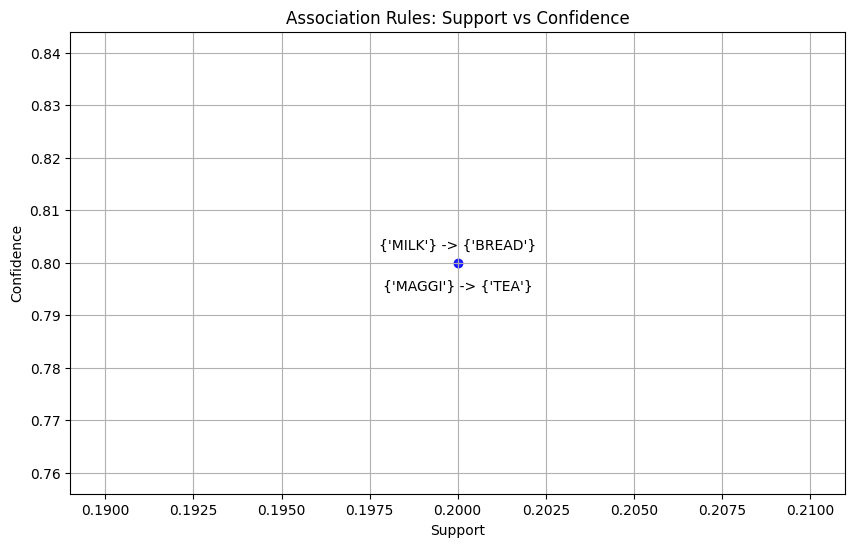

In [240]:
# 0. Import Libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder


### 1. Data Loading & 2. Preprocess Data & 3. Apply TransactionEncoder
# Read the dataset where each row contains items separated by commas
grocery_data = pd.read_csv('grocery.csv', header=None, names=['Items'])

# Split the 'Items' column into separate items and stack them into a single column
items_stacked = grocery_data['Items'].str.split(',', expand=True).stack()

# Get unique items and create column headers
unique_items = pd.Series(items_stacked.unique()).sort_values()

# Convert to Document dataset
rows_list = []
for index, row in grocery_data.iterrows():
    items = row['Items'].split(',')
    row_data = {item: 1 if item in items else 0 for item in unique_items}
    rows_list.append(row_data)

documented_data = pd.DataFrame(rows_list)

### 4. Generate Frequent Itemsets
# Convert documented_data to boolean type to avoid deprecation warning
documented_data_bool = documented_data.astype(bool)

# Using the Apriori algorithm to find frequent itemsets
frequent_itemsets_apriori = apriori(documented_data_bool, min_support=0.2, use_colnames=True)

# Alternatively, using the FP-Growth algorithm to find frequent itemsets
# frequent_itemsets_fpgrowth = fpgrowth(documented_data_bool, min_support=0.1, use_colnames=True)
# print(frequent_itemsets_fpgrowth)

# 5. Generate Association Rules
# Generate association rules from the frequent itemsets found using Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.70)

# Optionally, generate association rules from the frequent itemsets found using FP-Growth
# rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.7)
# print("Association Rules using FP-Growth:")
# print(rules_fpgrowth)


# 6. Display Rules
print("############################ Frequent Itemset ###############################")
print(frequent_itemsets_apriori)
print("############################ Association Rules ############################")
print(rules_apriori[['antecedents', 'consequents']])

# Create a scatter plot for the support and confidence of each rule
plt.figure(figsize=(10, 6))
offsets = {}
for index, rule in rules_apriori.iterrows():
    pos = (rule['support'], rule['confidence'])
    if pos in offsets:
        offsets[pos] -= 30  # Increase offset for overlapping points to better separate them
    else:
        offsets[pos] = 10  # Initial offset for annotations
    plt.scatter(rule['support'], rule['confidence'], alpha=0.6, c='blue')  # Plot each point with support on x-axis and confidence on y-axis
    # Annotate each point with the corresponding antecedents and consequents
    rule_label = f"{set(rule['antecedents'])} -> {set(rule['consequents'])}"
    plt.annotate(rule_label, (rule['support'], rule['confidence']), textcoords="offset points", xytext=(0, offsets[pos]), ha='center')
    
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

